# Discrete random variable

In [1]:
import numpy as np
from scipy.special import comb # n choose k
import matplotlib.pyplot as plt

%matplotlib inline

### Generation of a discrete random variable

- Let $U \sim U(0,1)$
- Let X be a discrete r.v. with the range S = {0,1,2,...,n} or S = {0,1,2,...}
- Denote $F(i) = P(X \leq i)$

Then the random variable Y, where $Y = min \{ i \in S \; | \; F(i) \geq U \}$

obeys the same distribution as X thus ($Y \sim X$)

* recall that binomial pdf: $^NC_k p^i (1-p)^{n-i}$

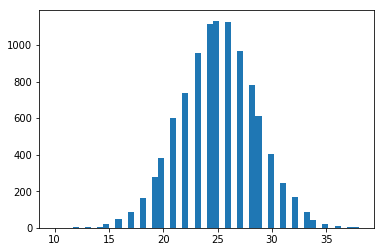

Sample Mean: 25.0119


In [2]:
# generate random exp variables
X = np.random.binomial(50,0.5,size=10000)
plt.hist(X, bins=50)
plt.show()
print(f'Sample Mean: {X.mean()}')

In [3]:
np.random.binomial(50,0.5,size=10000).mean()

24.9866

In [4]:
def pdf_binomial(i, n=50, p=0.5):
    return comb(n, i) * (p**i) * (1-p)**(n-i)

def cdf_binomial(i, n=50, p=0.5):
    return sum([pdf_binomial(i, n, p) for i in range(i+1)])

In [5]:
# we let X to be the binomial distribution

def generate_y():
    U = np.random.rand()
    for i in range(50):
        if cdf_binomial(i) >= U :
            return i

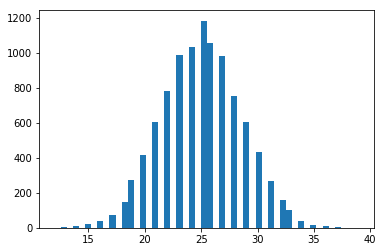

Sample Mean: 25.0232


In [6]:
ls = [generate_y() for i in range(10000)]
plt.hist(ls, bins=50)
plt.show()
print(f'Sample Mean: {np.mean(ls)}')

This is called the discretization method. In fact it is the inverse transformation
method for a discrete distribution

$Y = 1_{\{U > 1 - p\}} = 
\begin{cases}
0, U \leq 1 - p \\
1, U > 1 - p
\end{cases}
$ 

### value of the random number to be generated can directly be computed from the value of U using a simple formula
|Distribution|Expression for generation|
|---|---|
|Symetric bivalue {0,1}, p  |int(U + p)|
|Symetric bivalued {-1,1}, p|2* int(U + p) - 1|
|Trivalue {{1,2,3}} p       |int(U + p2) + int(U + p1 + p2)|
|Uniform discrete distrution <br> {0, 1, 2, .. n -1 }|int(nU)|
|Uniform discrete distrution <br> {1, 2, 3, .. n }|int(nU)+1|

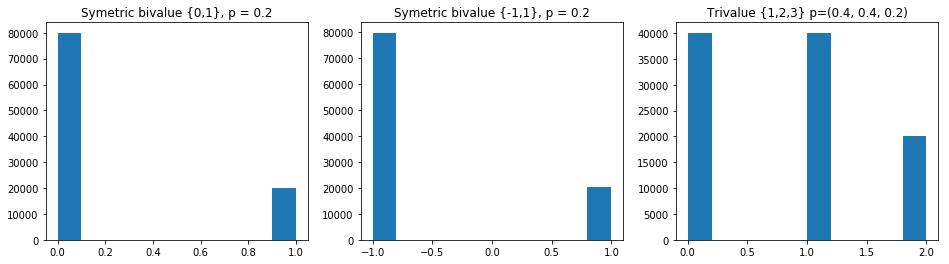

In [9]:
fig, axes = plt.subplots(ncols=3, figsize=(16,4))

p = 0.2
axes[0].hist([int(np.random.rand() + p) for _ in range(100000)], bins=10)
axes[0].set_title("Symetric bivalue {0,1}, p = " + str(p))
#axes[1].hist()
plt.plot()

axes[1].hist([2 * int(np.random.rand() + p) - 1 for _ in range(100000)], bins=10)
axes[1].set_title("Symetric bivalue {-1,1}, p = " + str(p))
#axes[1].hist()
plt.plot()

p1, p2 = 0.4, 0.2
generated_tri_values = map(lambda u: int(u + p2) + int(u + p1 + p2), [np.random.rand() for _ in range(100000)])
axes[2].hist(list(generated_tri_values), bins=10)
axes[2].set_title(f'Trivalue {{1,2,3}} p={round(1-(p1+p2), 2), p1, p2}')
#axes[1].hist()
plt.show()

### generate binomial(n, p) random variable $\sum_{i=1}^n int(U_i + p)$

In [13]:
# for example
n = 50
p = 0.5
sum([np.random.rand() + p for i in range(n)])

49.83563568225273

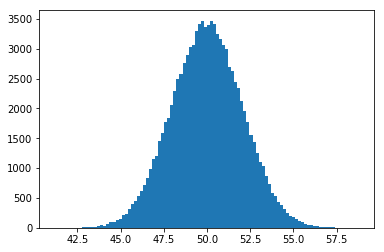

In [21]:
values = [
    sum([np.random.rand() + p for i in range(n)]) for _ in range(100000)
]
plt.hist(values, bins=100)
plt.show()

In [22]:
np.mean(values)

49.996921249066645

### Generation from geometric distribution

$P(X=i) = p_i = p(1-p)^i$  i failures + 1 success|

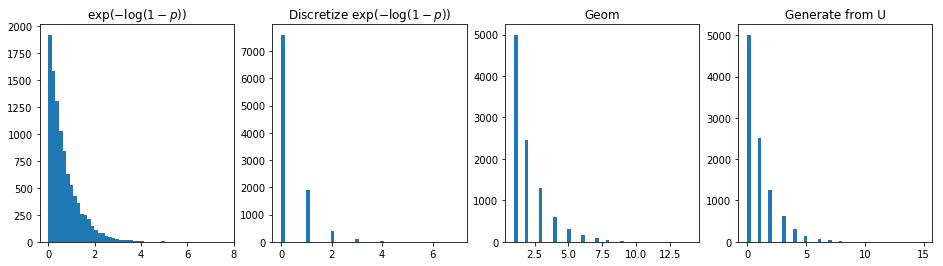

In [98]:
fig, axes = plt.subplots(ncols=4, figsize=(16, 4))

p = 0.5
def geo_x(p):
    u = np.random.rand()
    return int(np.log(u)/np.log(1-p))

geom = [np.random.exponential(-np.log(1-p)) for _ in range(10000)]

axes[0].hist(geom,  bins=50)
axes[0].set_title(r'$\exp(-\log(1-p))$')

axes[1].hist(list(map(int, geom)),  bins=50)
axes[1].set_title(r'Discretize $\exp(-\log(1-p))$')

axes[2].hist([np.random.geometric(p) for _ in range(10000)],  bins=50)
axes[2].set_title(r'Geom')

axes[3].hist([geo_x(p) for _ in range(10000)], bins=50)
axes[3].set_title("Generate from U")
plt.show()

note that the discretization seems a little off

discretization to the integer smaller than or equal to the value

### normal distribution

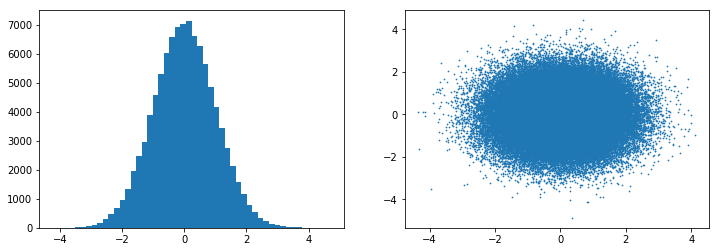

In [64]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

axes[0].hist([np.random.normal() for _ in range(100000)], bins=50)

normal_pair = np.transpose([(np.random.normal(), np.random.normal()) for _ in range(100000)])
axes[1].scatter(*normal_pair, s=0.5)
plt.show()

### Generate normal

$$X = \sqrt{-2 \log U} \cos 2\pi V U$$
$$Y = \sqrt{-2 \log U} \sin 2\pi V U$$

In [66]:
def generate_x():
    u = np.random.rand()
    v = np.random.rand()
    return np.sqrt(-2 * np.log(u)) * np.cos(2 * np.pi * v)

def generate_y():
    u = np.random.rand()
    v = np.random.rand()
    return np.sqrt(-2 * np.log(u)) * np.sin(2 * np.pi * v)

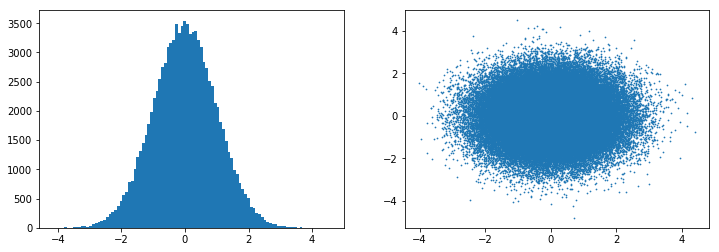

In [67]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))

x = [generate_x() for _ in range(100000)]
axes[0].hist(x, bins=100)

xy = [ ( generate_x(), generate_y() ) for _ in range(100000)]
xyt = np.transpose(xy)
axes[1].scatter(*xyt, s=0.5)

plt.show()